## **Imports**

In [116]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from keras.callbacks import EarlyStopping

## **Uploading datasets**

matches.csv contains the details of all ODI matches played during 2015-2023 before the World Cup.

In [117]:
matches_df = pd.read_csv("matches.csv")
matches_df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,Afghanistan,Scotland,Afghanistan,8 wickets,ICCA Dubai,08-01-2015
1,Afghanistan,Ireland,Ireland,3 wickets,Dubai (DSC),10-01-2015
2,New Zealand,Sri Lanka,New Zealand,3 wickets,Christchurch,11-01-2015
3,Ireland,Scotland,Ireland,3 wickets,Dubai (DSC),12-01-2015
4,Afghanistan,Scotland,Scotland,150 runs,Abu Dhabi,14-01-2015


teams.csv contains the details of all teams playing in the current World Cup.

In [118]:
teams_df = pd.read_csv("teams.csv")
teams_df.head()

,Team,Appearances,Titles,Finals,Semi Finals,Ranking,Points
0,India,12,2,3,7,1,265
1,England,12,1,4,6,2,259
2,New Zealand,12,0,2,8,3,255
3,Australia,12,5,7,8,4,252
4,Pakistan,12,1,2,6,5,251


schedule.csv contains the schedule of matches to be played in the current World Cup.

In [119]:
schedule_df = pd.read_csv("schedule.csv")
schedule_df.head()

,Match Date,Venue,Team 1,Team 2
0,05-10-2023,Ahmedabad,England,New Zealand
1,06-10-2023,Hyderabad,Pakistan,Netherlands
2,07-10-2023,Dharamsala,Bangladesh,Afghanistan
3,07-10-2023,Delhi,South Africa,Sri Lanka
4,08-10-2023,Chennai,India,Australia


## **Merging datasets**

In [120]:
df = pd.merge(matches_df, teams_df, how='inner', left_on='Team 1', right_on='Team')
df = pd.merge(df, teams_df, how='inner', left_on='Team 2', right_on='Team', suffixes=('_team1', '_team2'))
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Team_team1,Appearances_team1,Titles_team1,Finals_team1,Semi Finals_team1,Ranking _team1,Points_team1,Team_team2,Appearances_team2,Titles_team2,Finals_team2,Semi Finals_team2,Ranking _team2,Points_team2
0,Afghanistan,Bangladesh,Bangladesh,105 runs,Canberra,18-02-2015,Afghanistan,2,0,0,0,10,221,Bangladesh,6,0,0,0,9,226
1,Afghanistan,Bangladesh,Afghanistan,136 runs,Abu Dhabi,20-09-2018,Afghanistan,2,0,0,0,10,221,Bangladesh,6,0,0,0,9,226
2,Afghanistan,Bangladesh,Bangladesh,3 runs,Abu Dhabi,23-09-2018,Afghanistan,2,0,0,0,10,221,Bangladesh,6,0,0,0,9,226
3,Afghanistan,Bangladesh,Bangladesh,62 runs,Southampton,24-06-2019,Afghanistan,2,0,0,0,10,221,Bangladesh,6,0,0,0,9,226
4,New Zealand,Bangladesh,New Zealand,3 wickets,Hamilton,13-03-2015,New Zealand,12,0,2,8,3,255,Bangladesh,6,0,0,0,9,226


We have used the ranking of the winner to encode the winner column.

In [121]:
df['Winner'] = np.where(df['Winner'] == df['Team 1'], df['Ranking _team1'], np.where(df['Winner'] == df['Team 2'], df['Ranking _team2'], 0))
df.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Team_team1,Appearances_team1,Titles_team1,Finals_team1,Semi Finals_team1,Ranking _team1,Points_team1,Team_team2,Appearances_team2,Titles_team2,Finals_team2,Semi Finals_team2,Ranking _team2,Points_team2
0,Afghanistan,Bangladesh,9,105 runs,Canberra,18-02-2015,Afghanistan,2,0,0,0,10,221,Bangladesh,6,0,0,0,9,226
1,Afghanistan,Bangladesh,10,136 runs,Abu Dhabi,20-09-2018,Afghanistan,2,0,0,0,10,221,Bangladesh,6,0,0,0,9,226
2,Afghanistan,Bangladesh,9,3 runs,Abu Dhabi,23-09-2018,Afghanistan,2,0,0,0,10,221,Bangladesh,6,0,0,0,9,226
3,Afghanistan,Bangladesh,9,62 runs,Southampton,24-06-2019,Afghanistan,2,0,0,0,10,221,Bangladesh,6,0,0,0,9,226
4,New Zealand,Bangladesh,3,3 wickets,Hamilton,13-03-2015,New Zealand,12,0,2,8,3,255,Bangladesh,6,0,0,0,9,226


Irrelevant columns are dropped.

In [122]:
df.drop(['Team 1', 'Team 2', 'Team_team1', 'Team_team2', 'Margin', 'Match Date'], axis=1, inplace=True)
df.head()

,Winner,Ground,Appearances_team1,Titles_team1,Finals_team1,Semi Finals_team1,Ranking _team1,Points_team1,Appearances_team2,Titles_team2,Finals_team2,Semi Finals_team2,Ranking _team2,Points_team2
0,9,Canberra,2,0,0,0,10,221,6,0,0,0,9,226
1,10,Abu Dhabi,2,0,0,0,10,221,6,0,0,0,9,226
2,9,Abu Dhabi,2,0,0,0,10,221,6,0,0,0,9,226
3,9,Southampton,2,0,0,0,10,221,6,0,0,0,9,226
4,3,Hamilton,12,0,2,8,3,255,6,0,0,0,9,226


## **Encoding**

In [123]:
le1 = LabelEncoder()
df['Ground'] = le1.fit_transform(df['Ground'])
df.head()

,Winner,Ground,Appearances_team1,Titles_team1,Finals_team1,Semi Finals_team1,Ranking _team1,Points_team1,Appearances_team2,Titles_team2,Finals_team2,Semi Finals_team2,Ranking _team2,Points_team2
0,9,14,2,0,0,0,10,221,6,0,0,0,9,226
1,10,0,2,0,0,0,10,221,6,0,0,0,9,226
2,9,0,2,0,0,0,10,221,6,0,0,0,9,226
3,9,72,2,0,0,0,10,221,6,0,0,0,9,226
4,3,38,12,0,2,8,3,255,6,0,0,0,9,226


In [124]:
features = ['Ground', 'Appearances_team1', 'Titles_team1', 'Finals_team1', 'Semi Finals_team1', 'Ranking _team1', 'Points_team1', 'Appearances_team2', 'Titles_team2', 'Finals_team2', 'Semi Finals_team2', 'Ranking _team2', 'Points_team2']
target = 'Winner'

X = df[features]
y = df[target]

In [125]:
le2 = LabelEncoder()
all_teams = df['Winner'].unique()
le2.fit(all_teams)
y_encoded = to_categorical(le2.transform(y))

## **Test-train split and normalization**

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [127]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Neural network training**

In [128]:
def create_model(input_shape, output_shape, epochs=10, batch_size=32):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_shape, activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

param_grid = {'epochs': [10, 20, 30], 'batch_size': [16, 32, 64]}

best_model = None
best_accuracy = 0

for params in ParameterGrid(param_grid):
    print("Training model with hyperparameters:", params)
    model = create_model(input_shape=(X_train_scaled.shape[1],), output_shape=len(le2.classes_), **params)

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train, epochs=params['epochs'], batch_size=params['batch_size'],
                        validation_split=0.2, verbose=0, callbacks=[early_stopping])

    _, accuracy = model.evaluate(X_test_scaled, y_test)
    print(f'Test Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_params = params

print("Best Test Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_params)

Training model with hyperparameters: {'batch_size': 16, 'epochs': 10}
3/3 [==============================] - 0s 3ms/step - loss: 1.5538 - accuracy: 0.4421
Test Accuracy: 0.4421052634716034
Training model with hyperparameters: {'batch_size': 16, 'epochs': 20}
3/3 [==============================] - 0s 3ms/step - loss: 1.3194 - accuracy: 0.5368
Test Accuracy: 0.5368421077728271
Training model with hyperparameters: {'batch_size': 16, 'epochs': 30}
3/3 [==============================] - 0s 3ms/step - loss: 1.3015 - accuracy: 0.5579
Test Accuracy: 0.557894766330719
Training model with hyperparameters: {'batch_size': 32, 'epochs': 10}
3/3 [==============================] - 0s 3ms/step - loss: 1.7673 - accuracy: 0.4000
Test Accuracy: 0.4000000059604645
Training model with hyperparameters: {'batch_size': 32, 'epochs': 20}
3/3 [==============================] - 0s 4ms/step - loss: 1.5152 - accuracy: 0.4947
Test Accuracy: 0.49473685026168823
Training model with hyperparameters: {'batch_size': 32,

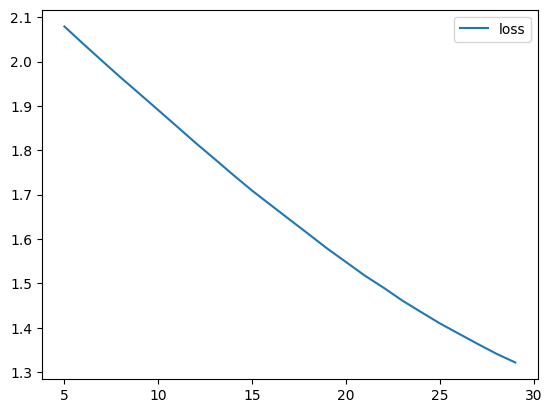

In [129]:
history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss']].plot();

## **Sample prediction**

In [130]:
pred = pd.merge(schedule_df, teams_df, how='inner', left_on='Team 1', right_on='Team')
pred = pd.merge(pred, teams_df, how='inner', left_on='Team 2', right_on='Team', suffixes=('_team1', '_team2'))
pred.drop(['Team 1', 'Team 2', 'Team_team1', 'Team_team2', 'Match Date'], axis=1, inplace=True)

pred['Venue'] = le1.fit_transform(pred['Venue'])
pred.rename(columns={"Venue": "Ground"})
pred.head()

,Venue,Appearances_team1,Titles_team1,Finals_team1,Semi Finals_team1,Ranking _team1,Points_team1,Appearances_team2,Titles_team2,Finals_team2,Semi Finals_team2,Ranking _team2,Points_team2
0,0,12,1,4,6,2,259,12,0,2,8,3,255
1,4,12,2,3,7,1,265,12,0,2,8,3,255
2,4,12,5,7,8,4,252,12,0,2,8,3,255
3,4,12,1,4,6,2,259,6,0,0,0,9,226
4,6,12,1,2,6,5,251,6,0,0,0,9,226


In [131]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pred)

In [132]:
predictions = model.predict(X_scaled)
predicted_labels = np.argmax(predictions, axis=1)
mapped_labels = ['no result', 'India', 'England', 'New Zealand', 'Australia', 'Pakistan', 'South Africa', 'Sri Lanka', 'Bangladesh', 'Afghanistan', 'Netherlands']
winners = [mapped_labels[label] for label in predicted_labels]

2/2 [==============================] - 0s 3ms/step


In [133]:
winners

['England',
 'India',
 'Australia',
 'New Zealand',
 'New Zealand',
 'South Africa',
 'New Zealand',
 'New Zealand',
 'Australia',
 'Bangladesh',
 'New Zealand',
 'New Zealand',
 'New Zealand',
 'Bangladesh',
 'South Africa',
 'New Zealand',
 'New Zealand',
 'Australia',
 'Bangladesh',
 'India',
 'New Zealand',
 'India',
 'New Zealand',
 'Australia',
 'Australia',
 'Australia',
 'New Zealand',
 'New Zealand',
 'South Africa',
 'New Zealand',
 'New Zealand',
 'Australia',
 'India',
 'India',
 'New Zealand',
 'Australia',
 'England',
 'India',
 'South Africa',
 'India',
 'New Zealand',
 'Australia',
 'Bangladesh',
 'Bangladesh',
 'India']

## **Semi-finalists and finalists prediction**

In [134]:
from collections import Counter

def count_appearances(lst):
    element_counts = Counter(lst)
    sorted_counts = sorted(element_counts.items(), key=lambda x: x[1], reverse=True)
    result_dict = dict(sorted_counts)
    return result_dict

leaderboard = count_appearances(winners)
leaderboard

{'New Zealand': 17,
 'Australia': 9,
 'India': 8,
 'Bangladesh': 5,
 'South Africa': 4,
 'England': 2}

In [135]:
semi_finalists = list(leaderboard.keys())[:4]

semi_finals = pd.DataFrame(columns=['Match Date', 'Venue', 'Team 1', 'Team 2'])
data_to_append = {'Match Date': ['15-11-2023', '16-11-2023'],
                  'Venue': ['Mumbai', 'Kolkata'],
                  'Team 1': [semi_finalists[0], semi_finalists[1]],
                  'Team 2': [semi_finalists[3], semi_finalists[2]]
                  }
semi_finals = pd.concat([semi_finals, pd.DataFrame(data_to_append)], ignore_index=True)
semi_finals

,Match Date,Venue,Team 1,Team 2
0,15-11-2023,Mumbai,New Zealand,Bangladesh
1,16-11-2023,Kolkata,Australia,India


In [136]:
pred2 = pd.merge(semi_finals, teams_df, how='inner', left_on='Team 1', right_on='Team')
pred2 = pd.merge(pred2, teams_df, how='inner', left_on='Team 2', right_on='Team', suffixes=('_team1', '_team2'))
pred2.drop(['Team 1', 'Team 2', 'Team_team1', 'Team_team2', 'Match Date'], axis=1, inplace=True)

pred2['Venue'] = le1.fit_transform(pred2['Venue'])
pred2.rename(columns={"Venue": "Ground"})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pred2)

predictions = model.predict(X_scaled)
predicted_labels = np.argmax(predictions, axis=1)
mapped_labels = ['no result', 'India', 'England', 'New Zealand', 'Australia', 'Pakistan', 'South Africa', 'Sri Lanka', 'Bangladesh', 'Afghanistan', 'Netherlands']
finalists = [mapped_labels[label] for label in predicted_labels]

finalists

1/1 [==============================] - 0s 14ms/step


['New Zealand', 'Australia']

## **Winner prediction**

In [137]:
finals = pd.DataFrame(columns=['Match Date', 'Venue', 'Team 1', 'Team 2'])
data_to_append = {'Match Date': ['19-11-2023'],
                  'Venue': ['Ahmedabad'],
                  'Team 1': [finalists[0]],
                  'Team 2': [finalists[1]]
                  }
finals = pd.concat([finals, pd.DataFrame(data_to_append)], ignore_index=True)
finals

,Match Date,Venue,Team 1,Team 2
0,19-11-2023,Ahmedabad,New Zealand,Australia


In [138]:
pred3 = pd.merge(finals, teams_df, how='inner', left_on='Team 1', right_on='Team')
pred3 = pd.merge(pred3, teams_df, how='inner', left_on='Team 2', right_on='Team', suffixes=('_team1', '_team2'))
pred3.drop(['Team 1', 'Team 2', 'Team_team1', 'Team_team2', 'Match Date'], axis=1, inplace=True)

pred3['Venue'] = le1.fit_transform(pred3['Venue'])
pred3.rename(columns={"Venue": "Ground"})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pred3)

predictions = model.predict(X_scaled)
predicted_labels = np.argmax(predictions, axis=1)
mapped_labels = ['no result', 'India', 'England', 'New Zealand', 'Australia', 'Pakistan', 'South Africa', 'Sri Lanka', 'Bangladesh', 'Afghanistan', 'Netherlands']
winner = [mapped_labels[label] for label in predicted_labels]

winner

1/1 [==============================] - 0s 15ms/step


['New Zealand']